https://discourse.pymc.io/t/nan-occured-in-optimization-in-a-vonmises-mixture-model/1296

In [1]:
%pylab inline

import pymc3 as pm
import pymc3.distributions.transforms as tr

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
with pm.Model() as model:
    mu_1 = pm.VonMises('mu_1', mu=0, kappa=1)
    kappa_1 = pm.Gamma('kappa_1', 1, 1)
    vm_1 = pm.VonMises.dist(mu=mu_1, kappa=kappa_1)
    w = pm.Dirichlet('w', np.ones(2))
    vm_comps = [vm_1, vm_1]
    vm = pm.Mixture('vm', w, vm_comps)
    
    approx = pm.fit(obj_optimizer=pm.adagrad_window(learning_rate=1e-3))

Average Loss = 0.76491:  34%|███▎      | 3362/10000 [00:01<00:02, 2705.00it/s]


FloatingPointError: NaN occurred in optimization. 
The current approximation of RV `w_stickbreaking__`.ravel()[0] is NaN.
Try tracking this parameter: http://docs.pymc.io/notebooks/variational_api_quickstart.html#Tracking-parameters

In [3]:
model.check_test_point()

kappa_1_log__       -1.00
mu_1_circular__     -1.07
vm                  -1.07
w_stickbreaking__   -1.39
Name: Log-probability of test_point, dtype: float64

In [4]:
with pm.Model() as model1:
    mu_1 = pm.VonMises('mu_1', mu=0, kappa=1)
    kappa_1 = pm.Gamma('kappa_1', 1, 1)
    vm_1 = pm.VonMises.dist(mu=mu_1, kappa=kappa_1)
    w = np.ones(2)*.5 # pm.Dirichlet('w', np.ones(2))
    vm_comps = [vm_1, vm_1]
    vm = pm.Mixture('vm', w, vm_comps, transform=tr.circular)

In [5]:
with model1:
    approx = pm.fit(obj_optimizer=pm.adagrad_window(learning_rate=1e-3))

Average Loss = 0.29266: 100%|██████████| 10000/10000 [00:02<00:00, 3371.16it/s]
Finished [100%]: Average Loss = 0.28407


In [6]:
with pm.Model() as model2:
    mu_1 = pm.VonMises('mu_1', mu=0, kappa=1)
    kappa_1 = pm.Gamma('kappa_1', 1, 1)
    vm_1 = pm.VonMises('vm_1', mu=mu_1, kappa=kappa_1)

In [7]:
with model2:
    approx = pm.fit(obj_optimizer=pm.adagrad_window(learning_rate=1e-3))

Average Loss = 0.30454: 100%|██████████| 10000/10000 [00:02<00:00, 3710.58it/s]
Finished [100%]: Average Loss = 0.29964


In [12]:
with pm.Model() as model_:
    mu_1 = pm.VonMises('mu_1', mu=0, kappa=1)
    kappa_1 = pm.Gamma('kappa_1', 1, 1)
    vm_1 = pm.VonMises.dist(mu=mu_1, kappa=kappa_1)
    w = pm.Dirichlet('w', np.ones(2))
    vm_comps = [vm_1, vm_1]
    vm = pm.Mixture('vm', w, vm_comps, transform=tr.circular)
    approx = pm.fit(100000, obj_n_mc=10, 
                   obj_optimizer=pm.adagrad_window(learning_rate=1e-2)
                   )

Average Loss = -6.2384: 100%|██████████| 100000/100000 [02:27<00:00, 678.84it/s] 
Finished [100%]: Average Loss = -6.2392


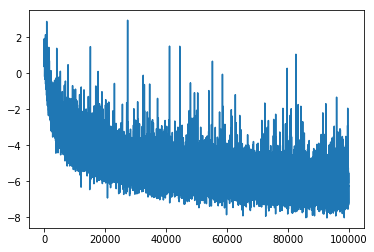

In [13]:
plt.plot(approx.hist);